# 차원축소 Assignment2

## MNIST data에 적용을 해보기 (╹◡╹)

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

In [3]:
# 데이터 정보!
# 7만개의 작은 숫자 이미지
# 행 열이 반대로 되어있음 -> 전치
# grayscale 28x28 pixel = 784 feature
# 각 picel은 0~255의 값
# label = 1~10 label이 총 10개인거에 주목하자

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


<Figure size 432x288 with 0 Axes>

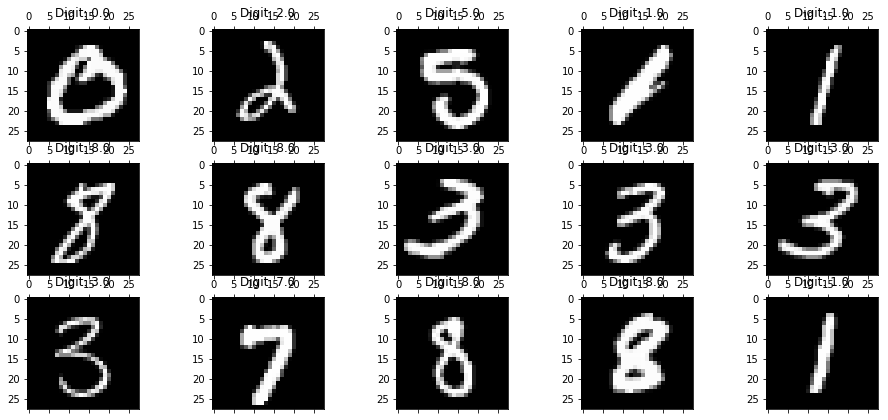

In [8]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X = X/255 #밝기의 최대인 255로 나눠준다

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 48)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!
강의에서 배웠던 3가지 중 어떤 걸 고려하였는지요! 
scree plot같은거는 직접 그려봐도 좋겠죠 ㅎㅎㅎ

In [11]:
from sklearn.decomposition import PCA

model = PCA()
model.fit(X_train)

PCA()

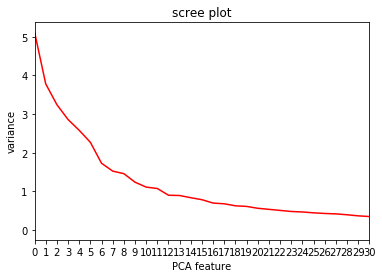

In [12]:
features = range(model.n_components_)
# plt.bar(features, model.explained_variance_)  #pca.explained_variance_ : eigenvalue
plt.plot(features, model.explained_variance_, 'r-')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.title('scree plot')
plt.xticks(features)
plt.xlim(0,30)
plt.show()

 - scree plot을 확인하면 대략 10개 정도의 feature의 variance가 1보다 크므로 n=10으로 결정

In [13]:
pca_model = PCA(n_components=10)
pca_X_train = pca_model.fit_transform(X_train)

In [14]:
pca_X_test = pca_model.transform(X_test)

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis(n_components = 5)
lda_X_train = lda_model.fit_transform(X_train, y_train)

In [16]:
lda_X_test = lda_model.transform(X_test)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import time
import warnings
warnings.filterwarnings("ignore")

In [18]:
def classify(model, data_train, data_test):
    
    #fit
    start = time.time()
    model.fit(data_train, y_train)
    times = round(time.time()-start,4)
    
    #pred
    y_pred = model.predict(data_test)
    #accuracy
    count = 0
    for i in range(len(y_pred)):
        if y_pred[i] == np.array(y_test)[i]:
            count += 1
    accuracy = count/len(y_pred)
    
    return times, accuracy

In [19]:
#logistic

lr_classifier = LogisticRegression()
print("Logistic Regression")

#Original
train_time, acc = classify(lr_classifier, X_train, X_test)
print("-Original Case")
print("Training Time:",train_time,"sec")
print("Accuracy:",round(acc,4))
print("-------------------------")

#PCA
train_time, acc = classify(lr_classifier, pca_X_train, pca_X_test)
print("-PCA Case")
print("Training Time:",train_time,"sec")
print("Accuracy:",round(acc,4))
print("-------------------------")

#LDA
train_time, acc = classify(lr_classifier, lda_X_train, lda_X_test)
print("-LDA Case")
print("Training Time:",train_time,"sec")
print("Accuracy:",round(acc,4))

Logistic Regression
-Original Case
Training Time: 14.9071 sec
Accuracy: 0.9236
-------------------------
-PCA Case
Training Time: 3.8617 sec
Accuracy: 0.8028
-------------------------
-LDA Case
Training Time: 2.5851 sec
Accuracy: 0.8309


 ### logistic regression
 - 차원 감소를 통한 학습 시간 감소를 확인할 수 있다.
 - 하지만 정확도 또한 감소한다.
 - PCA보다 LDA가 시간이 적게 걸리고, 정확도가 높다.

In [20]:
#random forest

rf_classifier = RandomForestClassifier(n_estimators=100, max_features=10,
                            n_jobs=-1, oob_score = True)
print("Random Forest")

#Original
train_time, acc = classify(rf_classifier, X_train, X_test)
print("-Original Case")
print("Training Time:",train_time,"sec")
print("Accuracy:",round(acc,4))
print("-------------------------")

#PCA
train_time, acc = classify(rf_classifier, pca_X_train, pca_X_test)
print("-PCA Case")
print("Training Time:",train_time,"sec")
print("Accuracy:",round(acc,4))
print("-------------------------")

#LDA
rf_classifier = RandomForestClassifier(n_estimators=100, max_features=5,
                            n_jobs=-1, oob_score = True)
train_time, acc = classify(rf_classifier, lda_X_train, lda_X_test)
print("-LDA Case")
print("Training Time:",train_time,"sec")
print("Accuracy:",round(acc,4))

Random Forest
-Original Case
Training Time: 25.7541 sec
Accuracy: 0.9656
-------------------------
-PCA Case
Training Time: 42.1194 sec
Accuracy: 0.8971
-------------------------
-LDA Case
Training Time: 26.0713 sec
Accuracy: 0.8369


 ### Random Forest
 - 차원 감소를 통한 학습 시간 감소가 없었다
 - 정확도는 차원이 높을수록 높았다

### 결과
 - Original data를 Random Forest를 통해 분류했을 때 약 96%의 높은 정확도로 분류했다.

특정한 틀 없이 자유롭게 해주시면 됩니다!

## 가장 높은 test accuracy가 나오신 분께 이모티콘 선물 드릴게요 ٩(๑❛ᴗ❛๑)۶